In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display

In [3]:
s1_path = "sample_audio/sample1.flac"
s2_path = "sample_audio/sample2.flac"
out_path = "sample_audio"

In [4]:
#y, sr = librosa.load('test_music.mp3', duration=120)
y, sr = librosa.load(s1_path)

# Decompose spectrogram into magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))
print(sr)

22050


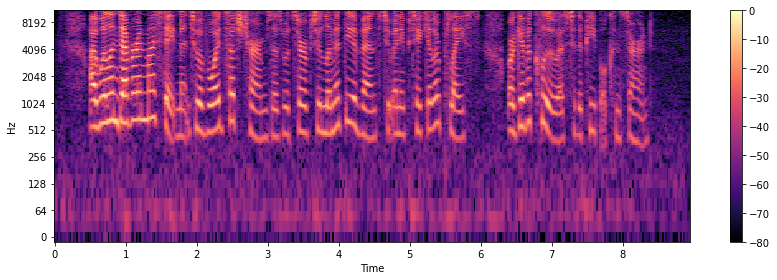

In [5]:
idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [29]:
def draw_spec(sound_path):
    #y, sr = librosa.load('test_music.mp3', duration=120)
    y, sr = librosa.load(sound_path)

#     # Decompose spectrogram into magnitude and phase
#     S_full, phase = librosa.magphase(librosa.stft(y))
#     print(sr)
    
#     idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
#     plt.figure(figsize=(12, 4))
#     librosa.display.specshow(librosa.amplitude_to_db(S_full[idx], ref=np.max),
#                          y_axis='log', x_axis='time', sr=sr)
#     plt.colorbar()
#     plt.tight_layout()
    
#     S_full=librosa.istft(S_full)

    S = librosa.feature.melspectrogram(y, sr)
    fig, ax = plt.subplots()
    
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    
    play_audio(y, sr)

In [17]:
import librosa, librosa.display
from IPython.display import Audio, display, clear_output

def play_audio(y, sr, autoplay=False):
    display(Audio(y, rate=sr, autoplay=autoplay))

<ipython-input-29-b3a1f21d5442>:18: FutureWarning: Pass y=[-6.1495352e-04 -1.1183226e-03 -1.2114287e-03 ...  5.1117450e-04
  9.5519936e-05 -2.9910490e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


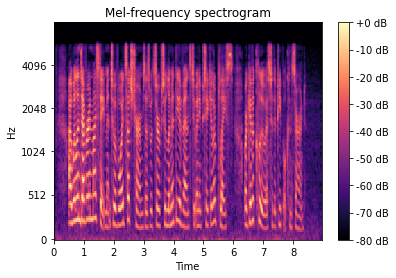

In [30]:
draw_spec(s1_path)

<ipython-input-29-b3a1f21d5442>:18: FutureWarning: Pass y=[ 9.1262933e-05  1.7076783e-04  1.8647453e-04 ... -6.5434028e-07
  5.5454649e-07  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


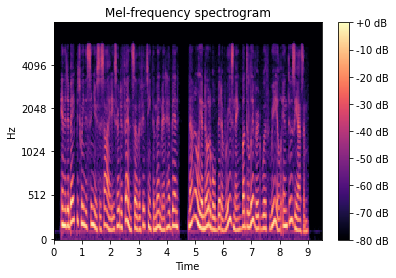

In [31]:
draw_spec(s2_path)

In [35]:
def audio_to_melspec(sound_path):
    y, sr = librosa.load(sound_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    
    return S   

In [47]:
S = librosa.feature.inverse.mel_to_stft(audio_to_melspec(s1_path))
y = librosa.griffinlim(S)

In [48]:
play_audio(y, sr=22050)